# 文書生成（テキスト翻訳）におけるモデル評価ベストプラクティスのシナリオ
## 1.はじめに
- 本チュートリアルでは、「T5 言語モデルを用いた翻訳タスクの評価」を題材に、翻訳精度を測定する手法について紹介します。具体的には、HuggingFaceの事前学習済みモデル（T5-small）を用い、翻訳結果を METEOR スコアで評価します。
- 本チュートリアルでは、制約の少ないデータセットを用い、手元で実行できる形で解説を進めます。
### 1.1.目次
- 1.はじめに
  - 1.1.目次
  - 1.2.シナリオの概要
  - 1.3.シナリオの流れ
  - 1.4.シナリオの到達目標
- 第一部：T5モデルを用いた翻訳タスクの評価
  - 2.対象AIT
  - 2.1ローカル構築
  - 3.対象モデル
  - 3.1.モデルの準備
  - 4.翻訳データセットの準備
  - 5.AIT実行
  - 5.1.必須のパッケージをを追加
  - 5.2.モデルとデータセット場所指定
  - 5.3.モデルとデータセットを読み込み
  - 5.4.モデルでインプットデータ翻訳し、METEORスコアを計算します
  - 5.5.AIT実行と結果確認
- 第二部：モデルの改善して、評価結果の精度を上がる
  - 6.モデル改善
  - 6.1.ファインチューニング
  - 6.2.ファインチューニング結果確認
- 第三部：QunomonとAITHUBを使って、レポートを生成する
  - 7.QunomonでAITを実行して、レポートを生成する

### 1.2.シナリオの概要
本シナリオでは、HuggingFaceの事前学習済みT5-smallモデルを用いて英語からフランス語への翻訳を実行し、翻訳品質をMETEORスコアで評価します。ファインチューニングでモデル品質向上、LLMモデルを使うベストプラクティスを見つける。

翻訳品質の評価指標は以下の通りです。

METEORスコア範囲
- 0.0 - 0.2: 翻訳の品質が非常に低い。
- 0.2 - 0.4: 翻訳の品質が低い。
- 0.4 - 0.6: 翻訳の品質が普通。
- 0.6 - 0.8: 翻訳の品質が良い。
- 0.8 - 1.0: 翻訳の品質が非常に高い。

### 1.3.シナリオの流れ
本シナリオでは、以下の流れで進めます。
- 翻訳モデルの準備：T5-smallの事前学習済みモデルをロードし、翻訳タスクを実行できるように設定します。
- データセットの準備：JSON形式の翻訳データセットを取得し、適切なフォーマットに整形します。
- 翻訳タスクの実行：T5モデルを用いて翻訳を生成します。
- 翻訳品質の評価：生成された翻訳と正解データ（参考訳）を比較し、METEORスコアを計算します。
- ファインチューニング：ファインチューニングにつ通じて、モデルの品質をあがります。
- 評価結果の確認：翻訳の品質を数値化します。

### 1.4.シナリオの到達目標
本シナリオの最終的な目標として、読者が以下の内容を実行できるようになることを目指します。
- T5モデルのセットアップと翻訳実行
- 翻訳データセットの処理と適用
- METEORスコアによる翻訳品質の評価
- 翻訳評価結果の解読
- ファインチューニングに通じて、モデルの品質を上がり
- LLMモデルプラクティス
本チュートリアルを通じて、翻訳タスクにおけるLLMの評価方法を理解し、モデルの品質向上とベストプラクティスにつなげることができます。

----

# 第一部 T5モデルを用いた翻訳タスクの評価

----

## 2.対象AIT
- eval_llm_meteor_score[こちら](https://github.com/aistairc/qai-testbed/tree/dev2_ait-repository/eval_llm_meteor_score)からダウンロード
- 説明：LLMモデルで翻訳タスクを実行し、生成された翻訳テキストの品質をMETEORスコアで評価します。このスコアを使用して、翻訳の品質を数値化し、モデル性能を測定します。

### 2.1.ローカル構築
- GitHubのサンプルAITをローカルにダウンロードします。Dockerを起動して、その後、toolフォルダ内のlaunch_devenv.batファイルを実行します。

## 3.対象モデル
- HuggingFaceの事前学習済みモデル（T5-small）[こちら](https://huggingface.co/google-t5/t5-small)からダウンロード

### 3.1.モデルの準備
事前トレーニング済みの大規模言語モデルと設定ファイルの格納ディレクトリ(eval_llm_meteor_score/local_qai/inventory/model)

必要なファイルは

- config.json
- model.safetensors
- generation_config.json
- special_tokens_map.json
- tokenizer_config.json
- tokenizer.json

## 4.翻訳データセットの準備
データセット格納ディレクトリ(eval_llm_meteor_score/local_qai/inventory)

- 原文と翻訳のデータセット、JSON形式{inputs:array, references:array}
- 原文：input
- 参照訳文：references
- 例：{inputs: 
       [MLflow is an open-source platform for managing the end-to-end machine learning (ML) lifecycle.], 
     references:
       [MLflow est une plateforme open-source pour la gestion du cycle de vie complet.]
    }

## 5.AIT実行
- 起動したjyputerLabにmy_ait.ipynbを修正して実行します。

### 5.1.必須のパッケージをを追加

In [6]:
if not is_ait_launch:
    requirements_generator.add_package('pandas','2.2.3')
    requirements_generator.add_package('ipywidgets','8.1.5')
    requirements_generator.add_package('transformers','4.46.3')
    requirements_generator.add_package('torch','2.5.1')

In [6]:
from nltk.translate.meteor_score import meteor_score
import os
import pandas as pd
import json
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

### 5.2.モデルとデータセット場所指定

In [6]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='translate_data',
                                     value='translate_data.json')
    input_generator.add_ait_inventories(name='llm_model_dir',
                                     value='model')

    input_generator.write()


### 5.3.モデルとデータセットを読み込み

In [6]:
    #インプットデータロードする
    with open(ait_input.get_inventory_path('translate_data'), "r") as file:
        json_data = json.load(file)
    eval_data = pd.DataFrame(json_data)
    
    # ローカルに保存されたLLMモデルを読み込む
    tokenizer_path = ait_input.get_inventory_path('llm_model_dir')
    model_path = ait_input.get_inventory_path('llm_model_dir')
    # Transformers を使用してモデルとトークナイザをロード
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

### 5.4.モデルでインプットデータ翻訳し、METEORスコアを計算します

In [6]:
    # モデルでインプットデータ翻訳する
    eval_data['predictions'] = eval_data['inputs'].apply(lambda x: generate_translation(x, tokenizer, model))
    # meteor_score計算する
    eval_data['meteor_score'] = eval_data.apply(calculate_meteor, axis=1)

def generate_translation(text, tokenizer, model):
    translation_input = f"translate English to French: {text}"
    inputs = tokenizer(translation_input, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model.generate(input_ids=inputs["input_ids"], max_length=50, num_beams=4, early_stopping=True) 
    translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translation
    
def calculate_meteor(row):
    tokenized_generated = row['predictions'].split()
    tokenized_reference = row['references'].split()
    return meteor_score([tokenized_reference], tokenized_generated)

### 5.5.AIT実行と結果確認
my_ait.ipynb実行結果は下記の通り

- 赤枠の部分は各訳文の品質をMETEORスコアの評価結果と平均スコア。
- 区間：0.01~0.05

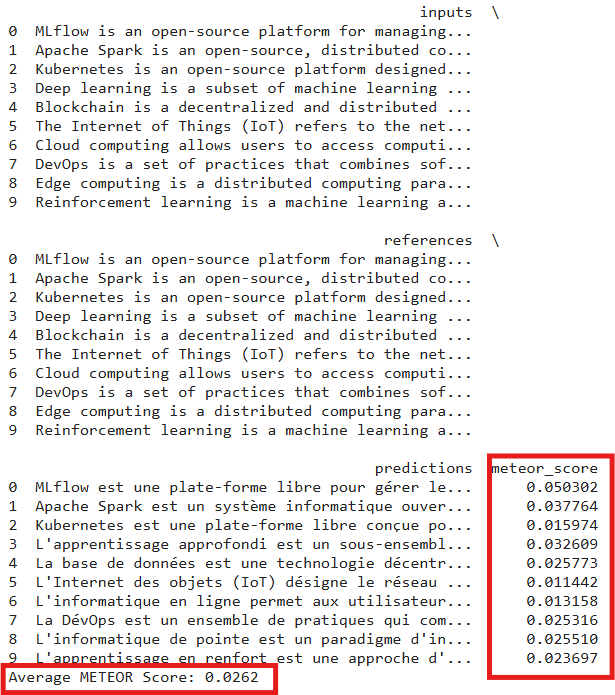


----

# 第二部 モデルの改善して、評価結果の精度を上がる

----

## 6.モデル改善
目的
- METEOR スコアの精度を向上させる
手段（ファインチューニング）
- 選択したモデルを、用意したデータセットで再学習する。
- 学習率やバッチサイズなどのハイパーパラメータを調整し、最適な設定を見つける。

### 6.1.ファインチューニング
下記ソースによってモデルの最適な設定を見つけって、モデルを更新する。

In [6]:
# ファインチューニング後、モデル保存ディレクトリ
FINETUNED_MODEL_DIR = "llm_model_dir_finetuned"

# 🔹 1. データロード
def load_translation_data():
    with open(ait_input.get_inventory_path('translate_data'), "r") as file:
        json_data = json.load(file)
    df = pd.DataFrame(json_data)

    dataset = Dataset.from_pandas(df)
    return dataset

# 🔹 2. Data Preprocessing
def preprocess_function(examples):
    inputs = [f"translate English to French: {text}" for text in examples["inputs"]]
    targets = [text for text in examples["references"]]

    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# 🔹 3. ファインチューニング
def fine_tune_model():
    global tokenizer
    tokenizer_path = ait_input.get_inventory_path('llm_model_dir')
    model_path = ait_input.get_inventory_path('llm_model_dir')

    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
    dataset = load_translation_data()
    tokenized_dataset = dataset.map(preprocess_function, batched=True)
    # トレーニングパラメータ
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        save_total_limit=2,
        logging_dir="./logs",
        logging_steps=100,
        push_to_hub=False,
        report_to="none"
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset,
        eval_dataset=tokenized_dataset,
        tokenizer=tokenizer
    )

    trainer.train()

    # モデル保存
    model.save_pretrained(FINETUNED_MODEL_DIR)
    tokenizer.save_pretrained(FINETUNED_MODEL_DIR)

    print(f"Fine-Tuned 保存先: {FINETUNED_MODEL_DIR}")

### 6.2.ファインチューニング結果確認
ファインチューニングで保存したモデルとその設定ファイルをAITのモデル格納ディレクトリに保存して、同じデータセットでAIT再実行します。

実行結果は下記の通り。METEORスコアの精度は10倍ぐらい上がる。

- 赤枠の部分は各訳文の品質をMETEORスコアの評価結果と平均スコア。
- 区間：0.13~0.53

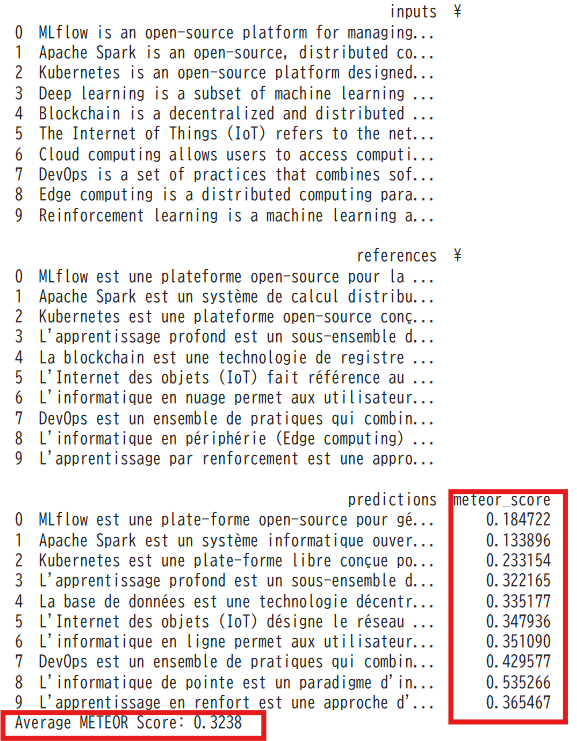

----

# 第三部 QunomonとAITHUBを使って、レポートを生成する

----

## 7.QunomonでAITを実行して、レポートを生成する

QunomonとAITHUBを使って、レポートを生成する手順はほかのシナリオに記載したので、[こちら](https://ait-hub.pj.aist.go.jp/qai/assets/notebook/imono-tutorial.html)を参照してください。